In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from tkinter import filedialog
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
ruta = r"C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\gastos\datos2014.csv"
print(f"\nArchivo: \n {ruta}")


Archivo: 
 C:\Users\sear2\Music\analisis_frecuencias\Analisis_de_Frecuencias\gastos\datos2014.csv


In [3]:
datos = pd.read_csv(ruta, header=None).values
datos.astype(float)
print(type(datos))
len(datos)

<class 'numpy.ndarray'>


62

In [4]:
m = datos.size
media = np.mean(datos)
desv_est =  np.std(datos, ddof=1)

In [9]:
matriz01 = np.zeros ((m, 6))
matriz02 = np.zeros ((m, 4))
matriz02 [:] = -999
matriz02 [0, 0] = 2
matriz02 [1, 0] = 5
matriz02 [2, 0] = 10
matriz02 [3, 0] = 20
matriz02 [4, 0] = 50
matriz02 [5, 0] = 100
matriz02 [6, 0] = 200
matriz02 [7, 0] = 500
matriz02 [8, 0] = 1000
matriz02 [9, 0] = 2000
matriz02 [10, 0] = 5000
matriz02 [11, 0] = 10000
EEstandart = np.full((m, 2), -999, float)

In [10]:
for i in range (m):
    matriz01 [i, 0] = i + 1                  # Se crea la columna para el No de Orden
    matriz01 [i, 1] = datos.max()         # Se crea la columna que contiene los gastos 
    j = datos.argmax()                    # registrados ordenado en forma descendente
    datos [j, 0] = -1
    matriz01 [i, 2] = (m + 1)/matriz01[i,0]  # Se crea la columna con los periodos de retorno  
                                                    # (Tr) a partir de la columna de los gastos registrados ordenados
    matriz01 [i, 3] = 1-(1/matriz01[i, 2])   # Se crea la columna para los valores de F(x) a partir de Tr

In [11]:
betaMom = desv_est
alfaMom = media - desv_est

In [12]:
betaMaxV = 0
for i in range (m):
            
    prueba = matriz01 [i, 1] - matriz01 [m - 1, 1]
    betaMaxV = betaMaxV + prueba
        
betaMaxV = betaMaxV / (m - 1)
alfaMaxV = matriz01 [m-1, 1] - (betaMaxV / (m - 1))

In [13]:
EEMom = 0
EEMaxV = 0 
for i in range (m):
          # Momentos
    matriz01 [i, 4] = alfaMom - (betaMom * np.log(1 - matriz01 [i, 3]))
    prueba = (matriz01 [i, 1] - matriz01 [i, 4]) ** 2
    EEMom = EEMom + prueba
          # Maxima Verosimilitud
    matriz01 [i, 5] = alfaMaxV - (betaMaxV * np.log(1 - matriz01 [i, 3]))
    prueba = (matriz01 [i, 1] - matriz01 [i, 5]) ** 2
    EEMaxV = EEMaxV + prueba
        # Se estiman los errores estandart para 2 parametros    
EEMom = (EEMom / (m - 2)) ** 0.5
EEMaxV = (EEMaxV /(m - 2)) ** 0.5
EEstandart[0, 0] = EEMom
EEstandart[0, 1] = EEMaxV

In [14]:
n = 12
for i in range (n):
                
    matriz02 [i, 1] = 1.0 - (1.0 / matriz02 [i, 0])  # se crea la columna de F(x)
                                                            # Valores Extrapolados
                                # Momentos
    matriz02 [i, 2] = alfaMom - (betaMom * np.log(1 - matriz02 [i, 1]))
                                # Maxima Verosimilitud
    matriz02 [i, 3] = alfaMaxV - (betaMaxV * np.log(1 - matriz02 [i, 1]))  
            

In [15]:
columnas = ['No Orden', 'Valor Registrado','Tr (Anios)', 'F(x)', 'Valor Ajustado (Momentos)', 'Valor Ajustado (Maxima Verosimilitud)']
cD = pd.DataFrame(matriz01, columns = columnas)
cD.insert(6, 'Tr', matriz02 [:, 0])
cD.insert(7, 'F(X)', matriz02 [:, 1])
cD.insert(8, 'Valor Extrapolado (Momentos)', matriz02 [:, 2])
cD.insert(9, 'Valor Extrapolado (Maxima Verosimilitud', matriz02 [:, 3])
cD.insert(10, 'Error Estandart "Momentos"', EEstandart[:, 0])
cD.insert(11, 'Error Estandart "Máxima verosimilitud"', EEstandart[:, 1])

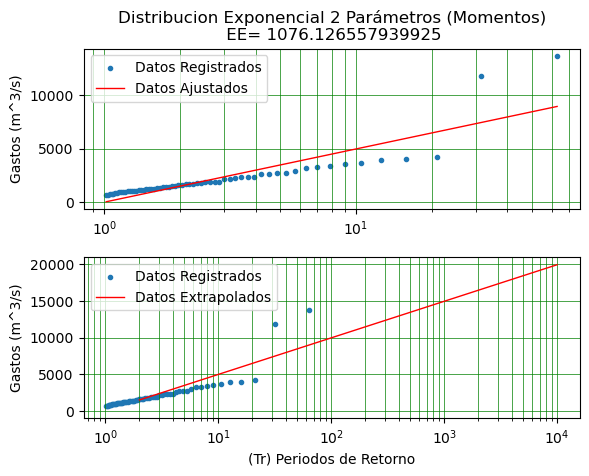

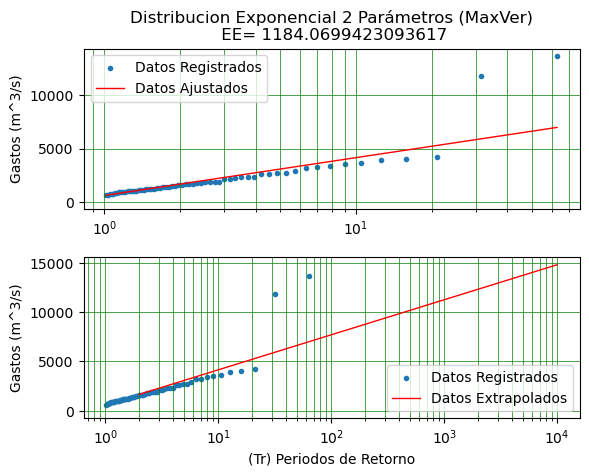

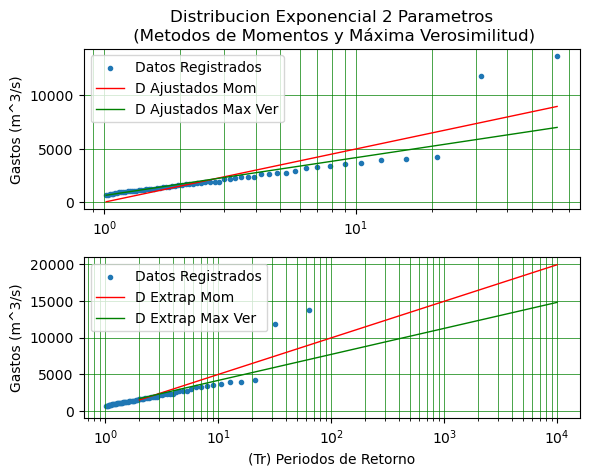

Distribucion Exponencial 2 parámetros, error estandart método de momentos:  1076.126557939925
Distribucion Exponencial 2 parámetros, error estandart método de maxima verosimilitud es:  1184.0699423093617


In [17]:

#*********************** * ********************************************************************
 # Graficos
#********************************************************************************************

titulo0 = "Distribucion Exponencial 2 Parámetros (Momentos)\n EE= " + str(EEMom)
titulo1 = "Distribucion Exponencial 2 Parámetros (MaxVer)\n EE= " + str(EEMaxV)

tR = matriz01 [:, 2]
dReg = matriz01 [:, 1]
dAjustMom = matriz01 [:, 4]
dAjustMax = matriz01 [:, 5]
dExtrapMom = matriz02 [:12, 2]
dExtrapMax = matriz02 [:12, 3]
dTrExtrap = matriz02 [:12, 0]
        
#********************************************************************************************
        
pl.subplot(2,1,1)
pl.subplots_adjust(hspace=0.3)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjustMom, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados")
pl.legend(loc="best")
pl.title(titulo0)
pl.ylabel("Gastos (m^3/s)")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)
        
pl.subplot(2,1,2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(dTrExtrap, dExtrapMom, color="r", linewidth="1.0", linestyle="-", label ="Datos Extrapolados")
pl.legend(loc="best")
pl.ylabel("Gastos (m^3/s)")
pl.xlabel("(Tr) Periodos de Retorno")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)
        
#pl.savefig("salidas/Exponencial2PMom.png", dpi=1200)
pl.show()
        
#********************************************************************************************
        
pl.subplot(2,1,1)
pl.subplots_adjust(hspace=0.3)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjustMax, color="r", linewidth="1.0", linestyle="-", label ="Datos Ajustados")
pl.legend(loc="best")
pl.title(titulo1)
pl.ylabel("Gastos (m^3/s)")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

pl.subplot(2,1,2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(dTrExtrap, dExtrapMax, color="r", linewidth="1.0", linestyle="-", label ="Datos Extrapolados")
pl.legend(loc="best")
pl.ylabel("Gastos (m^3/s)")
pl.xlabel("(Tr) Periodos de Retorno")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

#pl.savefig("salidas/Exponencial2PMaxV.png", dpi=1200)
pl.show()
        
#********************************************************************************************
        
pl.subplot(2,1,1)
pl.subplots_adjust(hspace=0.3)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(tR, dAjustMom, color="r", linewidth="1.0", linestyle="-", label ="D Ajustados Mom")
pl.plot(tR, dAjustMax, color="g", linewidth="1.0", linestyle="-", label ="D Ajustados Max Ver")
pl.legend(loc="best")
pl.title("Distribucion Exponencial 2 Parametros\n (Metodos de Momentos y Máxima Verosimilitud)")
pl.ylabel("Gastos (m^3/s)")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)

pl.subplot(2,1,2)
pl.scatter(tR, dReg, label='Datos Registrados', marker='.')
pl.plot(dTrExtrap, dExtrapMom, color="r", linewidth="1.0", linestyle="-", label ="D Extrap Mom")
pl.plot(dTrExtrap, dExtrapMax, color="g", linewidth="1.0", linestyle="-", label ="D Extrap Max Ver")
pl.legend(loc="best")
pl.ylabel("Gastos (m^3/s)")
pl.xlabel("(Tr) Periodos de Retorno")
pl.semilogx(True)
pl.grid(True, which='both', color='g', linestyle='-', linewidth=0.5)
        
#pl.savefig("salidas/Exponencial2PMomMaxV.png", dpi=1200)
pl.show()
        
#********************************************************************************************
        
print ("Distribucion Exponencial 2 parámetros, error estandart método de momentos: ", EEMom)
print ("Distribucion Exponencial 2 parámetros, error estandart método de maxima verosimilitud es: ", EEMaxV)